In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


### Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# Exploring data
train_images.shape

(60000, 28, 28)

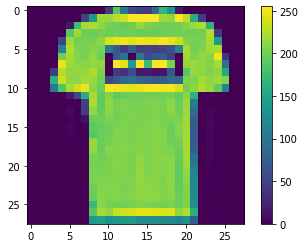

In [13]:
# Printing example
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# standardizing
train_images = train_images / 255.0
test_images = test_images / 255.0

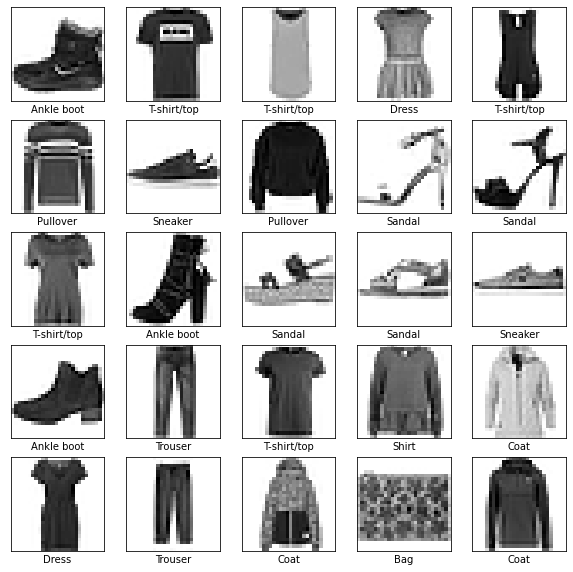

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # grayscale
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #flatten into 1D vector - standardized so no RGB
    tf.keras.layers.Dense(128, activation='relu'), #densely (fully) connected layers
    tf.keras.layers.Dense(10) #logits array of length 10. Each node is a score of belonging to one of the 10 classes
])

In [22]:
model.compile(optimizer='adam', #Adam algorithm
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # >= 2 label classes
              metrics=['accuracy']) #measures fraction of correct classifications

In [23]:
# Training
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4985 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3746 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3364 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3144 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2957 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2826 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2715 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2599 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2520 - accuracy: 0.9055
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.242

In [27]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3290 - accuracy: 0.8821

Test accuracy: 0.882099986076355


In [30]:
probability_model = tf.keras.Sequential([model, #returns logits, which aren't normalized
                                         tf.keras.layers.Softmax()]) #converts logits into probabilities

In [31]:
predictions = probability_model.predict(test_images)

In [38]:
# Printing example of first prediction
print(predictions[0])
# The prediction measures confidence values for each class
print(np.argmax(predictions[0])) #the label with the highest confidence value
print(test_labels[0]) #verifing

[3.3194490e-06 3.7560248e-09 1.1519425e-07 2.6248878e-07 5.1003951e-07
 7.1822334e-04 3.4005859e-06 1.6735608e-02 2.9817818e-06 9.8253560e-01]
9
9


In [51]:
# Graphing to look at full set of predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    # no ticks or grid
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # showing image in grayscale
    plt.imshow(img, cmap=plt.cm.binary)
    # blue if correct, red if not
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

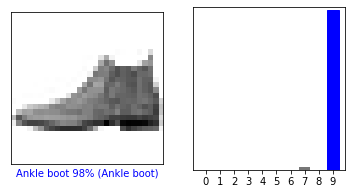

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

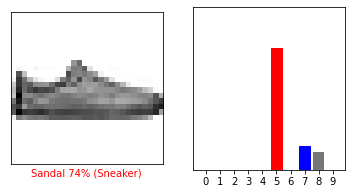

In [53]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

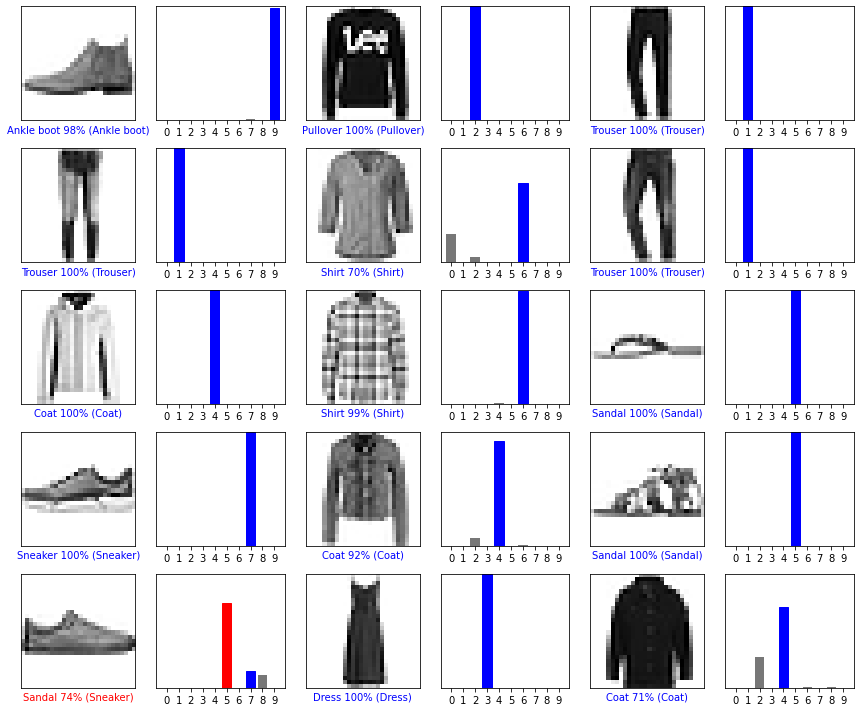

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()